# Training a dense neural network

Let's focus on the problem of handwritten digit recognition. It is a classification problem, because for each input image we need to specify the class - which digit it is.

In this unit, we start with the simplest possible approach for image classification - a fully-connected neural network (which is also called a *perceptron*). We will recap the way neural networks are defined in PyTorch, and how the training algorithm works. If you are familiar with those concepts - feel free to skip to the next unit, where we introduce Convolutional Neural Networks (CNNs).

We use `pytorchcv` helper to load all data we have talked about in the previous unit.


下面重点讨论手写数字识别的问题。 这是一个分类问题，因为对于每个输入图像，我们需要指定类别——它是哪个数字。

在本单元中，我们从最简单的图像分类方法开始——全连接神经网络（也称为*感知器*）。 我们将回顾神经网络在 PyTorch 中的定义方式，以及训练算法的工作原理。 如果您熟悉这些概念 - 请随时跳到下一单元，我们将在其中介绍卷积神经网络 (CNN)。

我们使用 `pytorchcv` 帮助程序来加载我们在上一单元中讨论过的所有数据。

In [4]:
!%load pytorchcv.py

/bin/bash: line 0: fg: no job control


In [2]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2023-02-09 10:15:04--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py’

pytorchcv.py        100%[===================>]   6.39K  --.-KB/s    in 0s      

2023-02-09 10:15:04 (110 MB/s) - ‘pytorchcv.py’ saved [6540/6540]



In [5]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary

from pytorchcv import load_mnist, plot_results
load_mnist()

## Fully-connected dense neural networks

A basic **neural network** in PyTorch consists of a number of **layers**. The simplest network would include just one fully-connected layer, which is called **Linear** layer, with 784 inputs (one input for each pixel of the input image) and 10 outputs (one output for each class).


PyTorch 中的基本**神经网络**由许多**层**组成。 最简单的网络只包括一个全连接层，称为 **线性** 层，具有 784 个输入（输入图像的每个像素一个输入）和 10 个输出（每个类一个输出）。

<img alt="A graph showing how an image is broken into layers based on the pixels." src="images/3-train-dense-neural-networks-1.png" width="60%"/>

As we discussed above, the dimension of our digit images is $1\times28\times28$, i.e. each image contains $28\times28=784$ different pixels. Because linear layer expects its input as one-dimensional vector, we need to insert another layer into the network, called **Flatten**, to change input tensor shape from $1\times28\times28$ to $784$.

After `Flatten`, there is a main linear layer (called `Dense` in PyTorch terminology) that converts 784 inputs to 10 outputs - one per class. We want $n$-th output of the network to return the probability of the input digit being equal to $n$.

Because the output of a fully-connected layer is not normalized to be between 0 and 1, it cannot be thought of as probability. Moreover, if want outputs to be probabilities of different digits, they all need to add up to 1. To turn output vectors into probability vector, a function called **Softmax** is often used as the last activation function in a classification neural network. For example, $\mathrm{softmax}([-1,1,2]) = [0.035,0.25,0.705]$.

> In PyTorch, we often prefer to use **LogSoftmax** function, which will also compute logarithms of output probabilities. To turn the output vector into the actual probabilities, we need to take **torch.exp** of the output. 

Thus, the architecture of our network can be represented by the following sequence of layers:

正如我们上面所讨论的，我们的数字图像的维度是 $1\times28\times28$，即每个图像包含 $28\times28=784$ 个不同的像素。 因为线性层期望它的输入是一维向量，所以我们需要在网络中插入另一个层，称为 **Flatten**，将输入张量形状从 $1\times28\times28$ 更改为 $784$。

在“Flatten”之后，有一个主要的线性层（在 PyTorch 术语中称为“Dense”），它将 784 个输入转换为 10 个输出——每个类一个。 我们希望网络的第 $n$ 个输出返回输入数字等于 $n$ 的概率。

因为全连接层的输出没有归一化到 0 到 1 之间，所以不能认为是概率。 此外，如果想要输出为不同数字的概率，则它们都需要加起来为 1。为了将输出向量转换为概率向量，分类神经网络中经常使用称为 **Softmax** 的函数作为最后一个激活函数 . 例如，$\mathrm{softmax}([-1,1,2]) = [0.035,0.25,0.705]$。

> 在 PyTorch 中，我们通常更喜欢使用 **LogSoftmax** 函数，它也会计算输出概率的对数。 要将输出向量转换为实际概率，我们需要对输出进行 **torch.exp**。

因此，我们的网络架构可以由以下层序列表示：

<img alt="An image showing the architecture of the network broken into a sequence of layers." src="images/3-train-dense-neural-networks-3.png" width="90%"/>

It can be defined in PyTorch in the following way, using `Sequential` syntax:

它可以在 PyTorch 中使用“Sequential”语法按以下方式定义：

In [7]:
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,10), # 784 inputs, 10 outputs
        nn.LogSoftmax())

This sequence of layers is shown below in more detail. For all vectors in this diagram we also indicate tensor size.

这个层次的序列在下面有更详细的显示。对于该图中的所有向量，我们也表示张量的大小。

<img alt="An image showing the architecture of the network broken into a sequence of layers." src="images/3-train-dense-neural-networks-2.png" width="90%"/>

On the right hand side of this diagram we also have expected network output, represented as one-hot encoded vector. Expected output is compared with the actual output of our network using **loss function**, that gives one number - loss - as an output. Our goal during network training is to minimize this loss by adjusting model parameters - layer weights.

在此图的右侧，我们还有预期的网络输出，表示为单热编码向量。 使用**损失函数**将预期输出与我们网络的实际输出进行比较，给出一个数字——损失——作为输出。 我们在网络训练期间的目标是通过调整模型参数 - 层权重来最小化这种损失。


## Training the network

A network defined in this way can take any digit as input and produce a vector of probabilities as an output. Let's see how this network performs by giving it a digit from our dataset:

以这种方式定义的网络可以将任何数字作为输入并生成概率向量作为输出。 让我们通过从我们的数据集中给它一个数字来看看这个网络是如何执行的：

In [8]:
print('Digit to be predicted: ',data_train[0][1])
torch.exp(net(data_train[0][0]))

/anaconda/envs/py38_default/lib/python3.8/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([[0.1353, 0.0835, 0.0843, 0.0942, 0.0899, 0.0955, 0.0924, 0.1150, 0.0937,
         0.1162]], grad_fn=<ExpBackward0>)

Digit to be predicted:  5


> Because we use `LogSoftmax` as final activation of our network, we pass network output through `torch.exp` to get probabilities.

As you can see the network predicts similar probabilities for each digit. This is because it has not been trained on how to recognize the digits. We need to give it our training data to train it on our dataset.

To train the model we will need to create **batches** from our dataset of a certain size, let's say 64. PyTorch has an object called **DataLoader** that can create batches of our data for us automatically:


> 因为我们使用 `LogSoftmax` 作为网络的最终激活函数，所以我们通过 `torch.exp` 传递网络输出以获得概率。

如您所见，网络预测每个数字的概率相似。 这是因为它没有接受过如何识别数字的训练。 我们需要给它我们的训练数据以在我们的数据集上训练它。

为了训练模型，我们需要从一定大小的数据集中创建**批次**，比如说 64。PyTorch 有一个名为 **DataLoader** 的对象，它可以自动为我们创建数据批次：

In [10]:
train_loader = torch.utils.data.DataLoader(data_train,batch_size=64)
test_loader = torch.utils.data.DataLoader(data_test,batch_size=64) # we can use larger batch size for testing

The training process steps are as follows:

1. We take a minibatch from the input dataset, which consists of input data (features) and expected result (label).
2. We calculate the predicted result for this minibatch. 
3. The difference between this result and expected result is calculated using a special function called the **loss function**. Loss function shows how different the output of the network is from the expected output. The goal of our training is to minimize the loss. 
4. We calculate the gradients of this loss function with respect to model weights (parameters), which are then used to adjust the weights to optimize the performance of the network. The amount of adjustment is controlled by a parameter called **learning rate**, and the details of optimization algorithm are defined in the **optimizer** object.
5. We repeat those steps until the whole dataset is processed. One complete pass through the dataset is called **an epoch**. 

Here is a function that performs one epoch training: 

训练过程步骤如下：

1. 我们从输入数据集中取出一个小批量，它由输入数据（特征）和预期结果（标签）组成。
2. 我们计算这个小批量的预测结果。
3. 此结果与预期结果之间的差异是使用称为**损失函数**的特殊函数计算的。 损失函数显示网络的输出与预期输出的差异程度。 我们训练的目标是最小化损失。
4. 我们计算这个损失函数相对于模型权重（参数）的梯度，然后用来调整权重以优化网络性能。 调整量由称为**学习率**的参数控制，优化算法的细节在**优化器**对象中定义。
5. 我们重复这些步骤，直到处理完整个数据集。 一次完整地遍历数据集称为**an epoch**。

这是一个执行一个时期训练的函数：

In [11]:
def train_epoch(net,dataloader,lr=0.01,optimizer=None,loss_fn = nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    net.train()
    total_loss,acc,count = 0,0,0
    for features,labels in dataloader:
        optimizer.zero_grad()
        out = net(features)
        loss = loss_fn(out,labels) #cross_entropy(out,labels)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==labels).sum()
        count+=len(labels)
    return total_loss.item()/count, acc.item()/count

train_epoch(net,train_loader)

(0.00593555196126302, 0.89275)

Since this function is pretty generic we will be able to use it later in our other examples. The function takes the following parameters:
* **Neural network**
* **DataLoader**, which defines the data to train on
* **Loss Function**, which is a function that measures the difference between the expected result and the one produced by the network. In most of the classification tasks `NLLLoss` is used, so we will make it a default.
* **Optimizer**, which defined an *optimization algorithm*. The most traditional algorithm is *stochastic gradient descent*, but we will use a more advanced version called **Adam** by default.
* **Learning rate** defines the speed at which the network learns. During learning, we show the same data multiple times, and each time weights are adjusted. If the learning rate is too high, new values will overwrite the knowledge from the old ones, and the network would perform badly. If the learning rate is too small it results in a very slow learning process. 

Here is what we do when training:
* Switch the network to training mode (`net.train()`)
* Go over all batches in the dataset, and for each batch do the following:
   - compute predictions made by the network on this batch (`out`)
   - compute `loss`, which is the discrepancy between predicted and expected values
   - try to minimize the loss by adjusting weights of the network (`optimizer.step()`)
   - compute the number of correctly predicted cases (**accuracy**)

The function calculates and returns the average loss per data item, and training accuracy (percentage of cases guessed correctly). By observing this loss during training we can see whether the network is improving and learning from the data provided.

It is also important to control the accuracy on the test dataset (also called **validation accuracy**). A good neural network with a lot of parameters can predict with decent accuracy on any training dataset, but it may poorly generalize to other data. That's why in most cases we set aside part of our data, and then periodically check how well the model performs on them. Here is the function to evaluate the network on test dataset:



由于此函数非常通用，我们稍后将能够在其他示例中使用它。 该函数采用以下参数：
* **神经网络**
* **DataLoader**，定义要训练的数据
* **损失函数**，这是一种衡量预期结果与网络产生的结果之间差异的函数。 在大多数分类任务中，都会使用 NLLLoss，因此我们将其设为默认值。
* **Optimizer**，它定义了一个*优化算法*。 最传统的算法是*随机梯度下降*，但我们将默认使用称为 **Adam** 的更高级版本。
* **学习率**定义网络学习的速度。 在学习过程中，我们多次展示相同的数据，每次调整权重。 如果学习率过高，新值会覆盖旧值，网络性能会很差。 如果学习率太小，会导致学习过程非常缓慢。

这是我们在训练时所做的：
* 将网络切换到训练模式（`net.train()`）
* 遍历数据集中的所有批次，对每个批次执行以下操作：
    - 计算网络对此批次所做的预测（`out`）
    - 计算“损失”，这是预测值和预期值之间的差异
    - 尝试通过调整网络的权重来最小化损失（`optimizer.step()`）
    - 计算正确预测案例的数量（**准确性**）

该函数计算并返回每个数据项的平均损失和训练准确度（正确猜测的案例百分比）。 通过在训练期间观察这种损失，我们可以看到网络是否正在改进并从提供的数据中学习。

控制测试数据集的准确性（也称为 **validation accuracy**）也很重要。 一个具有大量参数的良好神经网络可以在任何训练数据集上以不错的精度进行预测，但它可能很难推广到其他数据。 这就是为什么在大多数情况下我们会保留部分数据，然后定期检查模型对它们的执行情况。 这是在测试数据集上评估网络的函数：


In [12]:
def validate(net, dataloader,loss_fn=nn.NLLLoss()):
    net.eval()
    count,acc,loss = 0,0,0
    with torch.no_grad():
        for features,labels in dataloader:
            out = net(features)
            loss += loss_fn(out,labels) 
            pred = torch.max(out,1)[1]
            acc += (pred==labels).sum()
            count += len(labels)
    return loss.item()/count, acc.item()/count

validate(net,test_loader)

(0.00585213851928711, 0.894)

Similarly to `train` function, we return average loss and accuracy on test dataset.

与“train”函数类似，我们返回测试数据集的平均损失和准确度。

## Overfitting

Normally when training a neural network, we train the model for several epochs observing training and validation accuracy. In the beginning, both training and validation accuracy should increase, as the network picks up the patterns in the dataset. However, at some point it can happen that training accuracy increases while validation accuracy starts to decrease. That would be an indication of **overfitting**, that is model does well on your training dataset, but not on new data.

Below is the training function that can be used to perform both training and validation. It prints the training and validation accuracy for each epoch, and also returns the history that can be used to plot the loss and accuracy on the graph.


通常在训练神经网络时，我们训练模型几个时期观察训练和验证准确性。 一开始，随着网络在数据集中提取模式，训练和验证的准确性都应该提高。 然而，在某些时候，可能会发生训练准确性增加而验证准确性开始下降的情况。 这将表明出现了一个 **过拟合**现象，即模型在您的训练数据集上表现良好，但在新数据上表现不佳。

下面是可用于执行训练和验证的训练函数。 它打印每个时期的训练和验证准确性，并返回可用于在图表上绘制损失和准确性的历史记录。

In [13]:
def train(net,train_loader,test_loader,optimizer=None,lr=0.01,epochs=10,loss_fn=nn.NLLLoss()):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for ep in range(epochs):
        tl,ta = train_epoch(net,train_loader,optimizer=optimizer,lr=lr,loss_fn=loss_fn)
        vl,va = validate(net,test_loader,loss_fn=loss_fn)
        print(f"Epoch {ep:2}, Train acc={ta:.3f}, Val acc={va:.3f}, Train loss={tl:.3f}, Val loss={vl:.3f}")
        res['train_loss'].append(tl)
        res['train_acc'].append(ta)
        res['val_loss'].append(vl)
        res['val_acc'].append(va)
    return res

# Re-initialize the network to start from scratch
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,10), # 784 inputs, 10 outputs
        nn.LogSoftmax())

hist = train(net,train_loader,test_loader,epochs=5)

Epoch  0, Train acc=0.893, Val acc=0.894, Train loss=0.006, Val loss=0.006
Epoch  1, Train acc=0.910, Val acc=0.899, Train loss=0.005, Val loss=0.006
Epoch  2, Train acc=0.913, Val acc=0.899, Train loss=0.005, Val loss=0.006
Epoch  3, Train acc=0.915, Val acc=0.897, Train loss=0.005, Val loss=0.006
Epoch  4, Train acc=0.916, Val acc=0.897, Train loss=0.005, Val loss=0.006


This function logs messages with the accuracy on training and validation data from each epoch. It also returns this data as a dictionary (called **history**). We can then visualize this data to better understand our model training.

此函数记录消息，其中包含每个时期的训练和验证数据的准确性。 它还将此数据作为字典返回（称为 **history**）。 然后我们可以将这些数据可视化，以更好地理解我们的模型训练。

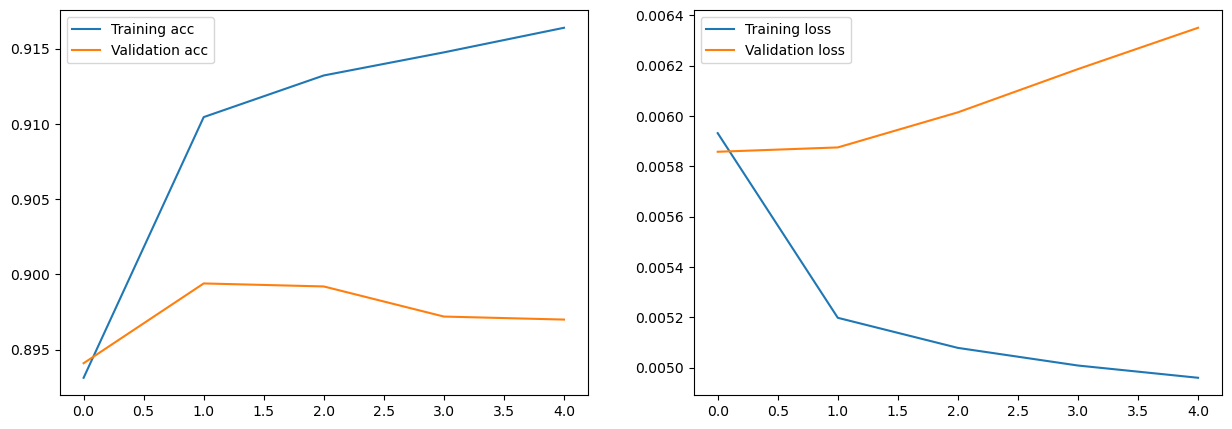

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(hist['train_acc'], label='Training acc')
plt.plot(hist['val_acc'], label='Validation acc')
plt.legend()
plt.subplot(122)
plt.plot(hist['train_loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.legend()


The diagram on the left shows the `training accuracy` increasing (which corresponds to the network learning to classify our training data better and better), while `validation accuracy` starts to fall. The diagram on the right show the `training loss` and `validation loss`, you can see the `training loss` decreasing (meaning its performing better) and the `validation loss` increasing (meaning its performing worse). These graphs would indicate the model is **overfitted**. 


左图显示`训练准确度`在增加（这对应于网络学习对我们的训练数据分类得越来越好），而`验证准确度`开始下降。 右图显示了`training loss`和`validation loss`，你可以看到`training loss`减少（意味着它表现更好）和`validation loss`增加（意味着它表现更差）。 这些图表表明模型是**过度拟合**。

## Visualizing network weights

The `Dense` layer in our network is also called *linear*, because it performs linear transformation of its input, which can be defined as $y=Wx+b$, where $W$ is a matrix of weights, and $b$ is bias. Weights matrix $W$ is in fact responsible for what our network can do, i.e. for recognizing digits. In our case, it has size of $784\times10$, because it produces 10 outputs (one output per digit) for an input image.

Lets visualize our weights of our neural network and see what they look like. When the network is more complex than just one layer it can be a difficult to visualize the results like this, because in complex network weights do not make much sense when visualized. However, in our case each of 10 dimensions of weight matrix $W$ correspond to individual digits, and thus can be visualized to see how the digit recognition takes place. For example, if we want to see if our number is 0 or not, we will multiply input digit by $W[0]$ and pass the result through a softmax normalization to get the answer. 

In the code below, we will first get the matrix $W$ into `weight_tensor` variable. It can be obtained by calling the `net.parameters()` method (which returns both $W$ and $b$), and then calling `next` to get the first of two parameters. Then we will go over each dimension, reshape it to $28\times28$ size, and plot. You can see that 10 weight tensor dimensions somewhat resemble the average shape of the digits they classify:



我们网络中的`Dense`层也称为*线性层*，因为它对其输入进行线性变换，可以定义为 $y=Wx+b$，其中 $W$ 是权重矩阵，$b $ 是偏见。 权重矩阵 $W$ 实际上负责我们的网络可以做什么，即识别数字。 在我们的例子中，它的大小为 $784\times10$，因为它为输入图像生成 10 个输出（每个数字一个输出）。

让我们可视化我们的神经网络的权重，看看它们是什么样的。 当网络比一层更复杂时，很难像这样可视化结果，因为在复杂的网络中，权重在可视化时没有多大意义。 然而，在我们的例子中，权重矩阵 $W$ 的 10 个维度中的每一个都对应于单个数字，因此可以可视化以查看数字识别是如何发生的。 例如，如果我们想看看我们的数字是否为 0，我们会将输入数字乘以 $W[0]$ 并将结果通过 softmax 归一化传递以获得答案。

在下面的代码中，我们首先将矩阵 $W$ 放入 `weight_tensor` 变量中。 它可以通过调用 `net.parameters()` 方法（返回 $W$ 和 $b$）获得，然后调用 `next` 获得两个参数中的第一个。 然后我们将遍历每个维度，将其重塑为 $28\times28$ 大小，并绘图。 您可以看到 10 个权重张量维度有点类似于它们分类的数字的平均形状：

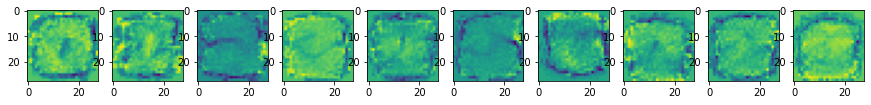

In [18]:
weight_tensor = next(net.parameters())
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i,x in enumerate(weight_tensor):
    ax[i].imshow(x.view(28,28).detach())

### Multi-layered perceptron

To further increase accuracy, we may want to include one or more **hidden layers**.

为了进一步提高准确性，我们可能希望包括一个或多个**隐藏层**。

<img alt="An image showing a multi-layer network with a hidden layer between the input layer and the output layer" src="images/3-train-dense-neural-networks-4.png" width="70%"/>

Our network layer structure will look like this:

我们的网络层结构将看起来像这样。

<img alt="An image showing the network layer structure as it's broken down into layers" src="images/3-train-dense-neural-networks-5.png" width="70%"/>

An important thing to note here is the non-linear activation function between layers, called **ReLU**. It is important to introduce those non-linear activation functions, because they are one of the reasons neural networks achieve high expressive power. Indeed, it can be demonstrated mathematically that if a network consisted just of a series of linear layers, it would essentially be equivalent to one linear layer. Thus inserting non-linear functions in between layers is important!

**ReLU** is a simplest activation function, which is defined as follows:

这里需要注意的是层间的非线性激活函数，称为**ReLU**。介绍这些非线性激活函数很重要，因为它们是神经网络实现高表达能力的原因之一。事实上，可以从数学上证明，如果一个网络只是由一系列的线性层组成，那么它基本上就等同于一个线性层。因此，在各层之间插入非线性函数是很重要的!

**ReLU**是一个最简单的激活函数，其定义如下。

$$
\mathrm{ReLU}(x) = \begin{cases} 0 & x<0 \\ x & x\ge0 \end{cases}
$$

Other activation functions used in deep learning are sigmoid and tanh, but ReLU is most often used in computer vision, because it can be quickly computed, and using other functions does not bring any significant benefits.


This network can be defined in PyTorch with this code:

深度学习中使用的其他激活函数有sigmoid和tanh，但ReLU在计算机视觉中最常使用，因为它可以快速计算，使用其他函数并不能带来任何明显的好处。


这个网络可以用这个代码在PyTorch中定义：

In [15]:
net = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(784,100),     # 784 inputs, 100 outputs
        nn.ReLU(),              # Activation Function
        nn.Linear(100,10),      # 100 inputs, 10 outputs
        nn.LogSoftmax(dim=0))

summary(net,input_size=(1,28,28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─ReLU: 1-3                              [1, 100]                  --
├─Linear: 1-4                            [1, 10]                   1,010
├─LogSoftmax: 1-5                        [1, 10]                   --
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

Here we use `summary()` function to display a detailed layer-by-layer structure of a network with some other useful information. In particular, we can see:

* Layer-by-layer structure of a network, and output size of each layer
* Number of parameters of each layer, as well as for the whole network. The more parameters the network has, the more data samples it needs to be trained on without **overfitting**.

Let's see how the number of parameters is calculated. First linear layer has 784 inputs and 100 outputs. The layer is defined by $W_1\times x+b_1$, where $W_1$ has size $784\times100$, and $b_1$ - $100$. Thus total number of parameters for this layer is $784\times100+100 = 78500$. Similarly, number of parameters for the second layer is $100\times10+10 = 1010$. Activation functions, as well as `Flatten` layers do not have parameters.

There is another syntax that we can use to define the same network by using classes:

这里我们使用`summary()`函数来显示一个网络的详细的逐层结构和一些其他有用的信息。特别是，我们可以看到。

* 网络的逐层结构，以及每层的输出大小
* 每层的参数数量，以及整个网络的参数数量。网络的参数越多，它需要训练的数据样本就越多，而不会出现**过拟合**。

让我们看看参数的数量是如何计算的。第一个线性层有784个输入和100个输出。该层由$W_1\times x+b_1$定义，其中$W_1$的大小为$784\times100$，$b_1$ - 100$。因此这一层的参数总数为$784\times100+100=78500$。同样，第二层的参数数为  $$100\times10+10 = 1010$ 。激活函数以及 'Flatten'层没有参数。

还有一种语法，我们可以通过使用类来定义相同的网络:

In [16]:
from torch.nn.functional import relu, log_softmax

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(784,100)
        self.out = nn.Linear(100,10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = relu(x)
        x = self.out(x)
        x = log_softmax(x,dim=0)
        return x

net = MyNet()

summary(net,input_size=(1,28,28),device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
MyNet                                    [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 100]                  78,500
├─Linear: 1-3                            [1, 10]                   1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.32
Estimated Total Size (MB): 0.32

You can see that the structure of a neural network is the same as with the `Sequential`-defined network, but the definition is more explicit. Our custom neural network is represented by a class inherited from ``torch.nn.Module`` class.

Class definition consists of two parts:
* In the constructor (`__init__`) we define all layers that our network will have. Those layers are stored as internal variables of the class, and PyTorch will automatically know that parameters of those layers should be optimized when training. Internally, PyTorch uses `parameters()` method to look for all trainable parameters, and `nn.Module` will automatically collect all trainable parameters from all sub-modules. 
* We define the `forward` method that does the forward pass computation of our neural network. In our case, we start with a parameter tensor `x`, and explicitly pass it through all the layers and activation functions, starting from `flatten`, up to final linear layer `out`. When we apply our neural network to some input data `x` by writing `out = net(x)`, the `forward` method is called. 

In fact, `Sequential` networks are represented in a very similar manner, they just store a list of layers and apply them sequentially during the forward pass. Here we have a chance to represent this process more explicitly, which eventually gives us more flexibility. That is one of the reasons that using classes for neural network definition is a recommended and preferred practice.

You can now try to train this network using exactly the same `train` function that we've defined above:

您可以看到神经网络的结构与`Sequential`定义的网络相同，但定义更明确。 我们的自定义神经网络由继承自 ``torch.nn.Module`` 类的类表示。

类定义由两部分组成：
* 在构造函数 (`__init__`) 中，我们定义了我们的网络将具有的所有层。 这些层存储为类的内部变量，PyTorch 会自动知道在训练时应该优化这些层的参数。 在内部，PyTorch 使用 parameters() 方法查找所有可训练参数，而 nn.Module 将自动从所有子模块收集所有可训练参数。
* 我们定义了 `forward` 方法来对我们的神经网络进行前向传递计算。 在我们的例子中，我们从参数张量`x`开始，并明确地将其传递给所有层和激活函数，从`flatten`开始，直到最后的线性层`out`。 当我们通过编写 `out = net(x)` 将神经网络应用于某些输入数据 `x` 时，将调用 `forward` 方法。

事实上，`Sequential`网络以非常相似的方式表示，它们只是存储一个层列表并在前向传播过程中按顺序应用它们。 在这里我们有机会更明确地表示这个过程，这最终给了我们更多的灵活性。 这就是使用类进行神经网络定义是推荐和首选做法的原因之一。

您现在可以尝试使用我们在上面定义的完全相同的`train`函数来训练这个网络：

Epoch  0, Train acc=0.927, Val acc=0.943, Train loss=0.035, Val loss=0.034
Epoch  1, Train acc=0.953, Val acc=0.951, Train loss=0.033, Val loss=0.033
Epoch  2, Train acc=0.957, Val acc=0.953, Train loss=0.033, Val loss=0.033
Epoch  3, Train acc=0.962, Val acc=0.958, Train loss=0.033, Val loss=0.033
Epoch  4, Train acc=0.962, Val acc=0.957, Train loss=0.033, Val loss=0.033


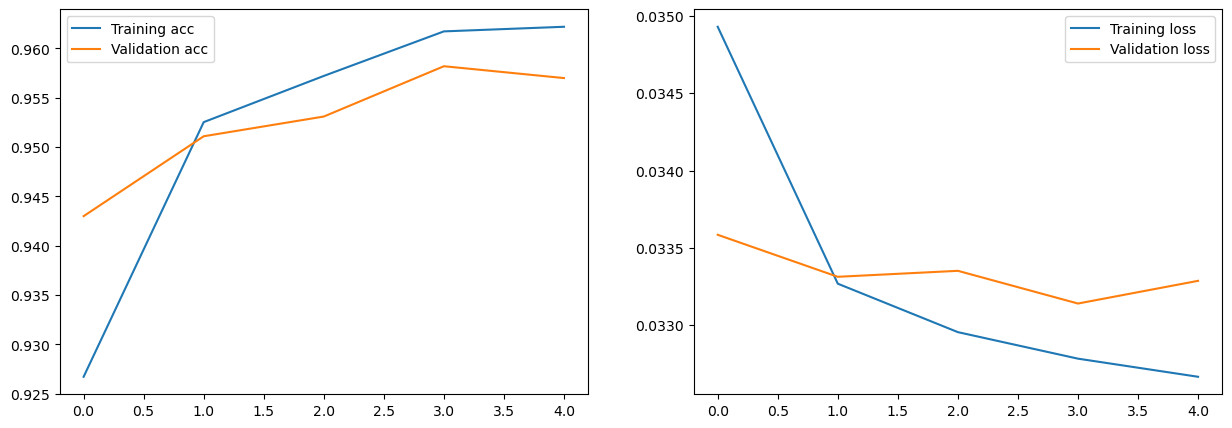

In [17]:
hist = train(net,train_loader,test_loader,epochs=5)
plot_results(hist)

## Takeaway 

Training a neural network in PyTorch can be programmed with a training loop. It may seem like a complicated process, but in real life we need to write it once, and we can then re-use this training code later without changing it.

We can see that a single-layer and multi-layer dense neural networks show relatively good performance, but if we try to apply them to real-world images, the accuracy will not be too high. In the next unit, we will introduce the concept of **convolutions**, which allow us to get much better performance for image recognition.  

在 PyTorch 中训练神经网络可以使用训练循环进行编程。 这可能看起来是一个复杂的过程，但在现实生活中我们需要编写一次，然后我们可以在以后不更改它的情况下重新使用这个训练代码。

我们可以看到单层和多层密集神经网络表现出相对较好的性能，但是如果我们尝试将它们应用到真实世界的图像中，准确度不会太高。 在下一个单元中，我们将介绍**卷积**的概念，它使我们能够获得更好的图像识别性能。